In [213]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
df = pd.read_csv('/Users/egmzvalerio/apps/iteso-data-analytics/data/raw/Madrid_listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6369,Rental unit in Madrid · ★4.88 · 1 bedroom · 1 ...,13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,85.0,5,106,2023-10-16,0.63,1,22,4,NaN
1,30320,Rental unit in Madrid · ★4.63 · 1 bedroom · 2 ...,130907,Dana,Centro,Sol,40.41476,-3.70418,Entire home/apt,65.0,5,172,2022-09-26,1.05,3,0,0,NaN
2,21853,Rental unit in Madrid · ★4.58 · 1 bedroom · 1 ...,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31.0,4,33,2018-07-15,0.30,2,135,0,NaN
3,24805,Rental unit in Madrid · ★4.91 · 6 bedrooms · 1...,346366726,Alvaro,Centro,Universidad,40.42183,-3.70529,Entire home/apt,94.0,5,33,2023-11-06,0.30,1,168,8,NaN
4,30959,Loft in Madrid · ★4.38 · 1 bedroom · 1 bed · 1...,132883,Angela,Centro,Embajadores,40.41259,-3.70105,Entire home/apt,NaN,3,8,2017-05-30,0.08,1,0,0,NaN


In [215]:
df = df.drop(['host_id', 'host_name', 'last_review', 'reviews_per_month', 'license'], axis = 1)
df.head()

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,6369,Rental unit in Madrid · ★4.88 · 1 bedroom · 1 ...,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,85.0,5,106,1,22,4
1,30320,Rental unit in Madrid · ★4.63 · 1 bedroom · 2 ...,Centro,Sol,40.41476,-3.70418,Entire home/apt,65.0,5,172,3,0,0
2,21853,Rental unit in Madrid · ★4.58 · 1 bedroom · 1 ...,Latina,Cármenes,40.40381,-3.74130,Private room,31.0,4,33,2,135,0
3,24805,Rental unit in Madrid · ★4.91 · 6 bedrooms · 1...,Centro,Universidad,40.42183,-3.70529,Entire home/apt,94.0,5,33,1,168,8
4,30959,Loft in Madrid · ★4.38 · 1 bedroom · 1 bed · 1...,Centro,Embajadores,40.41259,-3.70105,Entire home/apt,NaN,3,8,1,0,0


In [216]:
df.isna().sum()

id                                   0
name                                 0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             3809
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

<Axes: >

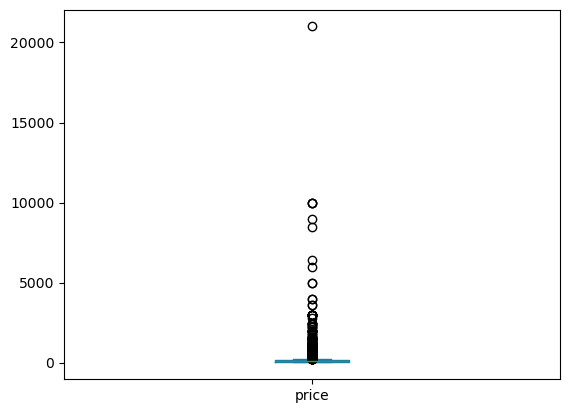

In [217]:
df['price'].plot(kind = 'box', )

In [218]:
df['price'].max()

21000.0

In [219]:
media_precio = df['price'].mean()
print('La media del precio', media_precio)

df['price'].fillna(media_precio, inplace = True)

La media del precio 129.01605778963835


In [220]:
df.isna().sum()

id                                0
name                              0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [221]:
Le = LabelEncoder()

In [222]:
df[['type_property', 'stars', 'bedrooms', 'beds', 'baths']] = df['name'].str.split(' · ', expand = True)

df['type_property'] = df['type_property'].str.split(' ')
for i in df['type_property']:
    df['type_property'] = i[0]

df['stars'] = df['stars'].str.replace('★', '')

df['bedrooms'] = df['bedrooms'].astype(str).str[0]
df['beds'] = df['beds'].astype(str).str[0]
df['baths'] = df['baths'].astype(str).str[0]

df = df.drop('name', axis = 1)

df.head()

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,type_property,stars,bedrooms,beds,baths
0,6369,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,85.000000,5,106,1,22,4,Rental,4.88,1,1,1
1,30320,Centro,Sol,40.41476,-3.70418,Entire home/apt,65.000000,5,172,3,0,0,Rental,4.63,1,2,1
2,21853,Latina,Cármenes,40.40381,-3.74130,Private room,31.000000,4,33,2,135,0,Rental,4.58,1,1,1
3,24805,Centro,Universidad,40.42183,-3.70529,Entire home/apt,94.000000,5,33,1,168,8,Rental,4.91,6,1,1
4,30959,Centro,Embajadores,40.41259,-3.70105,Entire home/apt,129.016058,3,8,1,0,0,Rental,4.38,1,1,1
